# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [5]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [6]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

*Add your implementation and discussion*

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

*Add your implementation and discussion*

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [7]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [8]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

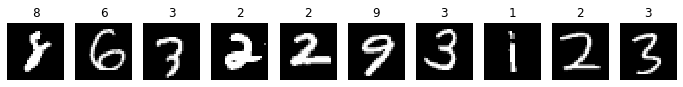

In [9]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*

In [10]:
import sklearn 
from sklearn.preprocessing import StandardScaler
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

First we transform our images to numpy arrays

In [11]:
X_train = np.array(train_images)
X_test = np.array(test_images)

In order to reshape the images into vectors we need the number of samples of the training set and the testing set

In [12]:
N_train, w, h = X_train.shape
N_test,_,_ = X_test.shape

In [13]:
X_train = X_train.reshape(N_train,-1)
X_test = X_test.reshape(N_test,-1)

In [14]:
X_test.shape

(10000, 784)

We standerdize the data to avoid overflows and its always a good thing. Moreover, we will be using PCA in order to improve the classification. For that, data need to be standerdized.

In [15]:
scaler = StandardScaler()
scaler.fit(X_train)
# Apply transform to both the training set and the test set
X_train_pca = scaler.transform(X_train, copy= False)
X_test_pca = scaler.transform(X_test, copy= False)

Here, we use logistic regression in order to classify our data.

In [16]:
tic = time()

# Fit a linear regression model
clf = LogisticRegression(solver ='lbfgs', tol = 1e-2, max_iter = 1000, random_state=0,verbose=2).fit(X_train, train_labels)
# Compute the classification score
score = clf.score(X_test,test_labels)

toc = time()
print('The total time is %s seconds ' % (toc-tic))
print(score)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.3s remaining:    0.0s


The total time is 257.4637289047241 seconds 
0.9175


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.3min finished


Here we try to improve our accuracy with PCA. We take 95% of the energy of the data. lower than that, the accuracy decreases. This is quite expected as the PCA decreases information held by the data.

In [17]:
pca = PCA(0.95)
pca.fit(X_train)
origi_img = X_train
trans_img = pca.fit_transform(origi_img)
trans_img = pca.inverse_transform(trans_img)

In [18]:
trans_test = pca.fit_transform(X_test)
trans_test = pca.inverse_transform(trans_test)
tic = time()

# Fit a logistic regression model on the PCA coefficients
clf = LogisticRegression(solver ='lbfgs', tol = 1e-2, max_iter = 1000, random_state=0,verbose=2)\
                        .fit(trans_img, train_labels)

score = clf.score(trans_test,test_labels)

toc = time()

print('The total time is %s seconds' % (toc-tic))
print(score)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

We can see an improvement of the accuracy by 1.6%.
In the next step, we will use CNN which is a promising machine learning technique. CNN mimic human way to recognize images which explains its very good results and diffrent image classification problems.

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We need to reshape the images in order to feed it to the network. Conv2D need a 4 dimension input (N_samples, im_width, im_height, n_color_space). n_color_space is 1 in this case since we have grayscale images.
Moreover, this is a multiclassification problem, so we need to transform the output layer.

In [56]:
x_train = np.array(train_images).reshape(N_train,w,h,1)
x_test = np.array(test_images).reshape(N_test,w,h,1)

y_train = np.zeros((N_train,10))
for n, i in enumerate(train_labels):
    y_train[n][i] = 1
    
y_test = np.zeros((N_test,10))
for n, i in enumerate(test_labels):
    y_test[n][i] = 1

We chose the following architecture. 3 convolution layers, and 3 hidden layers and one output layer.

In [89]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
model = Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'softmax'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_18 (Averag (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_19 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_28 (Dense)             (None, 84)               

In [90]:
datagen = ImageDataGenerator(rotation_range=45, horizontal_flip=True, vertical_flip=True)
training_data = datagen.flow(x_train,y_train,batch_size = 100)
testing_data = datagen.flow(x_test,y_test,batch_size = 100)

In [91]:
epochs = 10
history = model.fit(training_data, epochs=epochs, validation_data = testing_data)

Train for 600 steps, validate for 100 steps
Epoch 1/10
600/600 [==============================] - 26s 43ms/step - loss: 0.2813 - accuracy: 0.9077 - val_loss: 0.1995 - val_accuracy: 0.9247
Epoch 2/10
600/600 [==============================] - 26s 43ms/step - loss: 0.1829 - accuracy: 0.9308 - val_loss: 0.1618 - val_accuracy: 0.9390
Epoch 3/10
600/600 [==============================] - 25s 42ms/step - loss: 0.1529 - accuracy: 0.9430 - val_loss: 0.1392 - val_accuracy: 0.9481
Epoch 4/10
600/600 [==============================] - 26s 43ms/step - loss: 0.1353 - accuracy: 0.9505 - val_loss: 0.1255 - val_accuracy: 0.9542
Epoch 5/10
600/600 [==============================] - 25s 42ms/step - loss: 0.1229 - accuracy: 0.9556 - val_loss: 0.1170 - val_accuracy: 0.9571
Epoch 6/10
600/600 [==============================] - 25s 41ms/step - loss: 0.1137 - accuracy: 0.9592 - val_loss: 0.1054 - val_accuracy: 0.9614
Epoch 7/10
600/600 [==============================] - 25s 42ms/step - loss: 0.1066 - accurac

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

As expected, CNN offers an almost perfect classification. We get up to 99.31% of accuracy in our validation set. We will definately use this model in our project.

In [ ]:
plt.imsh1